<a href="https://colab.research.google.com/github/NirjharDebnath/Machine-Learning/blob/main/Classical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning Models

In [103]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd



## List of classical machine learning models

### **Regression Models**
1. **Linear Regression**
2. **Logistic Regression**
3. **Ridge Regression**
4. **Lasso Regression**
5. **Elastic Net Regression**
6. **Random Forest Regression**
7. **Support Vector Machines Regression**

### **Classification Models**
6. **k-Nearest Neighbors (k-NN)**
7. **Support Vector Machines (SVM)**
8. **Naïve Bayes**
9. **Decision Trees**
10. **Random Forest**
11. **Gradient Boosting Machines (GBM)**  
   - Includes models like XGBoost, LightGBM, and CatBoost.

### **Clustering Models**
12. **k-Means Clustering**
13. **Hierarchical Clustering**
14. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
15. **Gaussian Mixture Models (GMM)**

### **Dimensionality Reduction**
16. **Principal Component Analysis (PCA)**
17. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
18. **Linear Discriminant Analysis (LDA)**
19. **Factor Analysis**
20. **Independent Component Analysis (ICA)**

### **Ensemble Methods**
21. **Bagging (e.g., Bagged Trees)**
22. **Boosting (e.g., AdaBoost, Gradient Boosting)**
23. **Stacking**

### **Anomaly Detection**
24. **Isolation Forest**
25. **One-Class SVM**

### **Recommendation Systems**
26. **Collaborative Filtering**
27. **Matrix Factorization**

### **Other Classical Algorithms**
28. **Perceptron**
29. **Gaussian Processes**
30. **Markov Models (e.g., Hidden Markov Model)**

 😊

## Regression


#### Data

In [104]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame
x, y = data["Latitude"], data["Longitude"]

In [105]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


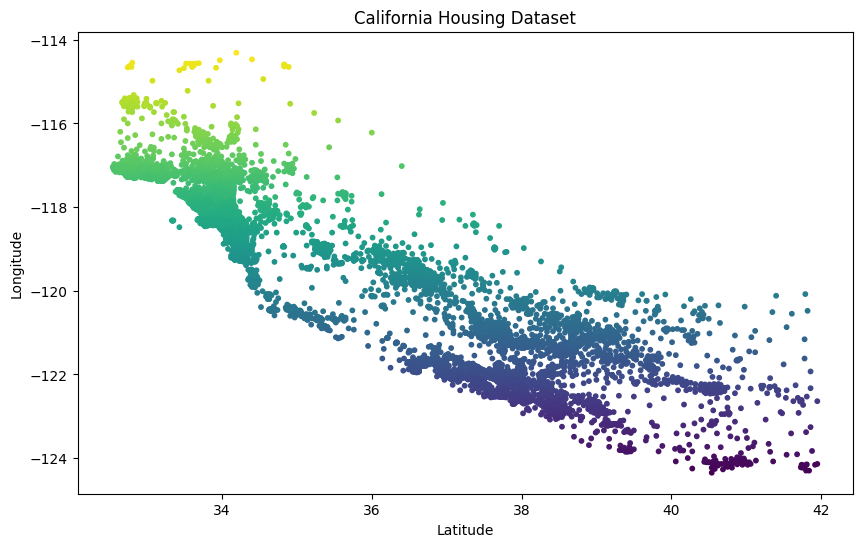

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, s=10, cmap=plt.cm.viridis)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('California Housing Dataset')
plt.show()

In [107]:
data.isnull().sum() # no missing data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [108]:
Y = data['MedHouseVal']
X = data.drop(columns = 'MedHouseVal')
X = X.to_numpy()
Y = Y.to_numpy()

In [109]:
X.shape, Y.shape

((20640, 8), (20640,))

#### Model

Linear Regression

In [110]:
model = []
mse = []
rmse = []
r2 = []

In [111]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
Model : LinearRegression()
Root Mean square Error = 0.7455813830127749
Mean Square Error = 0.5558915986952422
R2 Score = 0.5757877060324524


Polynomial Regression

In [112]:
# improvising polynomial regression

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2) # on testing different degrres of polinomial equation the best possible value is kept
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
Model = linear_model.LinearRegression()

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(f"{Model} with {poly}")
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {poly} with {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.5539974  1.75118566 3.49237927 ... 4.57436358 1.03279127 1.92414302]
Model : PolynomialFeatures() with LinearRegression()
Root Mean square Error = 0.6813967465119813
Mean Square Error = 0.4643015261571134
R2 Score = 0.6456819711504156


Ridge Regression

In [113]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Ridge(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71923978 1.76395141 2.70909238 ... 4.46864495 1.18785499 2.00912494]
Model : Ridge()
Root Mean square Error = 0.7455222779992692
Mean Square Error = 0.5558034669932196
R2 Score = 0.5758549611440138


Lasso Regression

In [114]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Lasso(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.72559335 1.87880366 2.14751489 ... 2.8426924  1.95352989 1.95475031]
Model : Lasso()
Root Mean square Error = 0.9685214254184276
Mean Square Error = 0.9380337514945428
R2 Score = 0.2841671821008396


Elastic Net Regression

In [115]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.ElasticNet(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.46966793 1.74416962 2.23145715 ... 3.39813146 1.87369056 1.85958549]
Model : ElasticNet()
Root Mean square Error = 0.8743887238506185
Mean Square Error = 0.7645556403971131
R2 Score = 0.41655189098028245


In [116]:
ModelResultBoard = pd.DataFrame(np.array([model, mse, rmse, r2]).T, columns=['Model', 'MSE', 'RMSE', 'R2'])
ModelResultBoard.sort_values(by='R2', ascending=False)

,Model,MSE,RMSE,R2
1,LinearRegression() with PolynomialFeatures(),0.464302,0.681397,0.645682
2,Ridge(),0.555803,0.745522,0.575855
0,LinearRegression(),0.555892,0.745581,0.575788
4,ElasticNet(),0.764556,0.874389,0.416552
3,Lasso(),0.938034,0.968521,0.284167
